<a href="https://colab.research.google.com/github/ariefwcks303/MachineLearningFromScratch/blob/main/Machine_Learning_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library dan Dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def read_dataframe(path):
  df = pd.read_csv(path)
  return df

In [ ]:
path_test = '/content/drive/MyDrive/3. Dicoding Platform/2. Microsoft Elevate Training Center/3. Memulai Pemograman dengan Python/Dataset/machine learning workflow dataset/test.csv'
data_test=read_dataframe(path_test)

data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
path_train = '/content/drive/MyDrive/3. Dicoding Platform/2. Microsoft Elevate Training Center/3. Memulai Pemograman dengan Python/Dataset/machine learning workflow dataset/train.csv'
data_train=read_dataframe(path_train)

data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Memeriksa kelengkapan Data

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data_train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Memeriksa Nilai yang hilang pada data train

In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_value_train = data_train.isnull().sum()
missing_value_train[missing_value_train>0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


buat kategori data yang hilang, dibawa 75% dan diatas 75%

In [ ]:
less_missing = missing_value_train[missing_value_train < 1000].index
over_missing = missing_value_train[missing_value_train>=1000].index

Mengisi nilai yang hilang berdasarkan jenis data ( numeric dan categorical )

In [ ]:
# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = data_train[less_missing].select_dtypes(include=['number']).columns
data_train[numeric_features] = data_train[numeric_features].fillna(data_train[numeric_features].median())

In [ ]:
# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
categorical_features = data_train[less_missing].select_dtypes(include=['object']).columns
for column in categorical_features:
    data_train[column] = data_train[column].fillna(data_train[column].mode()[0])

In [ ]:
df = data_train.drop(columns=over_missing)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


periksa data jika sudah di inputasi

In [ ]:
missing_value = df.isnull().sum()
missing_value[missing_value>0]

,0


memeriksa outlier setiap feature

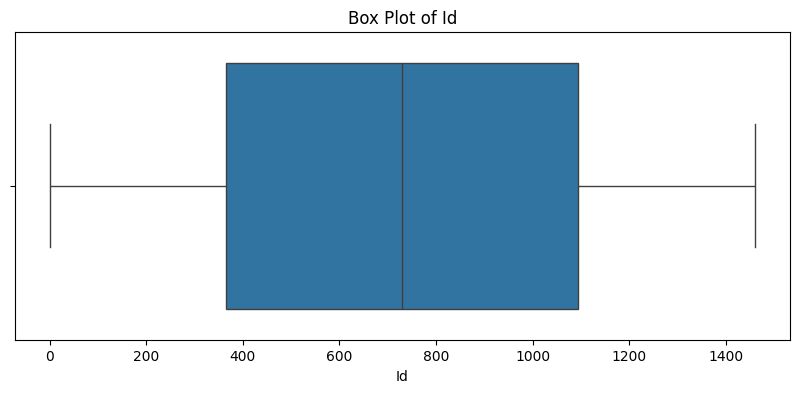

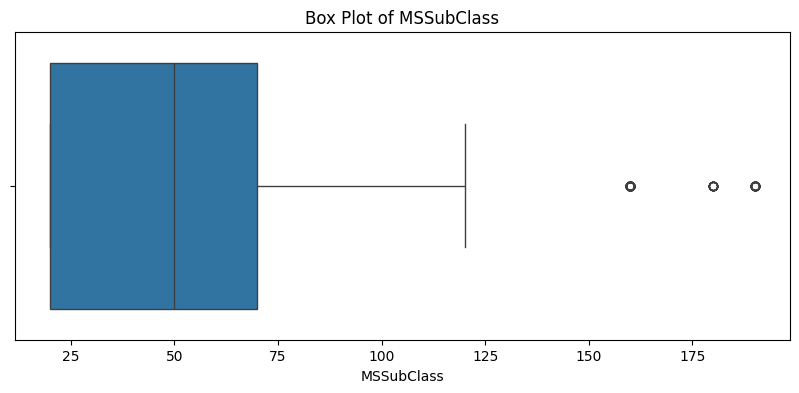

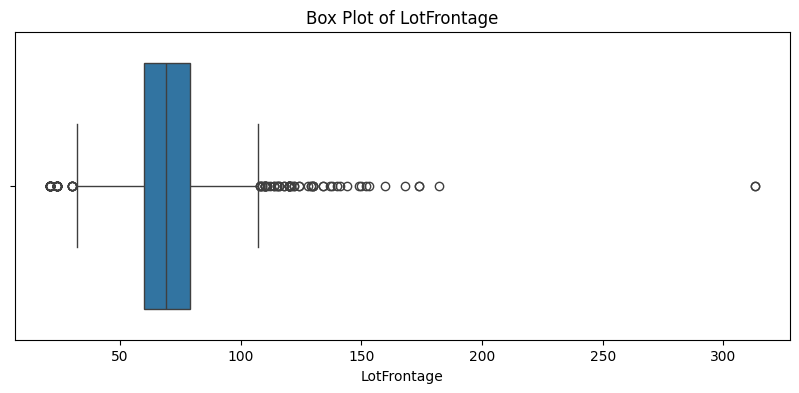

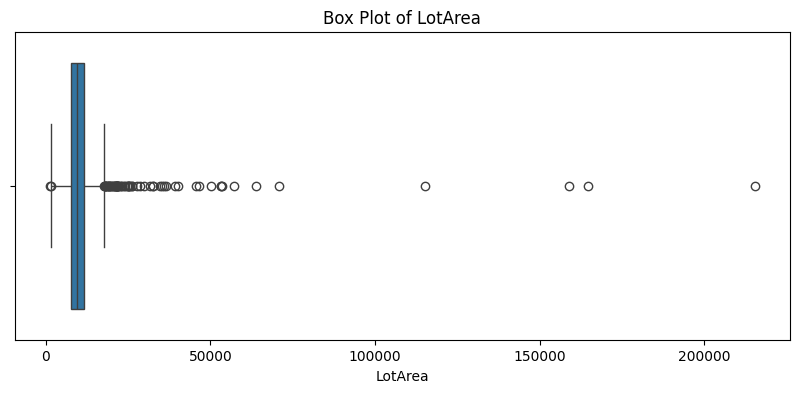

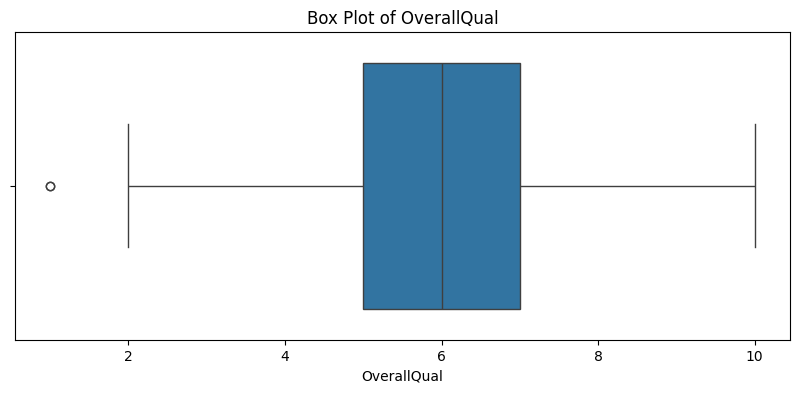

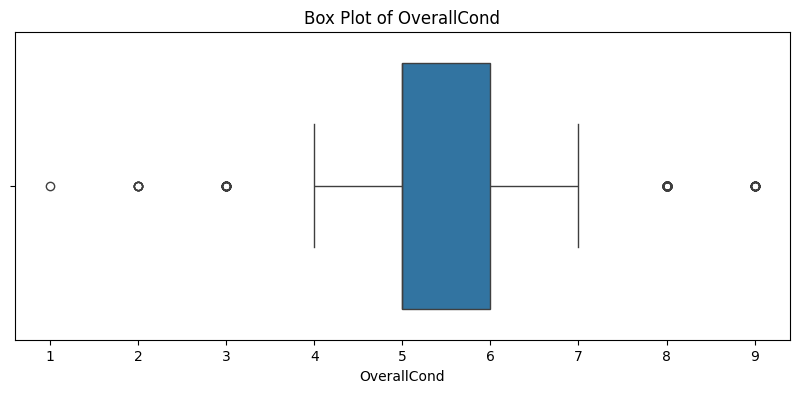

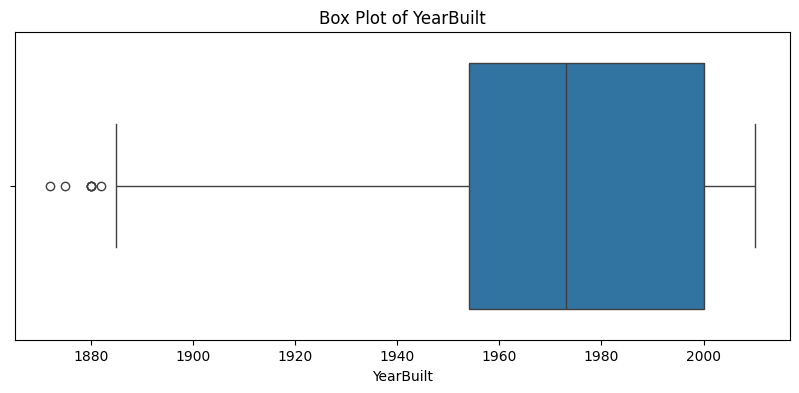

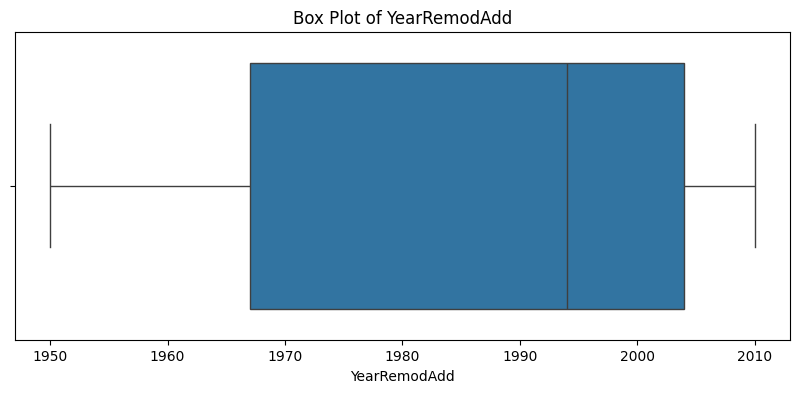

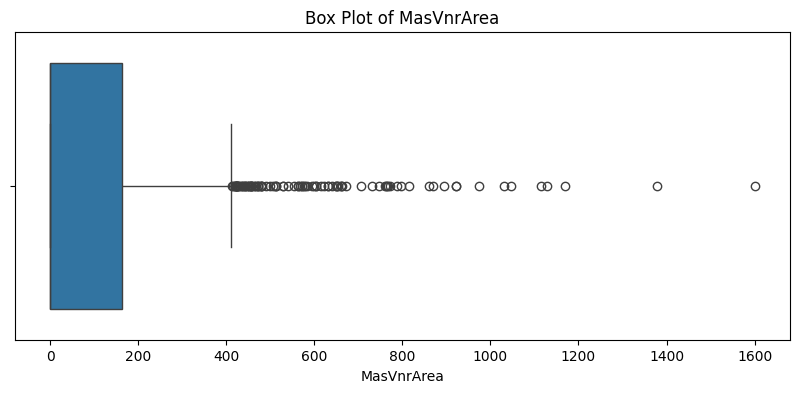

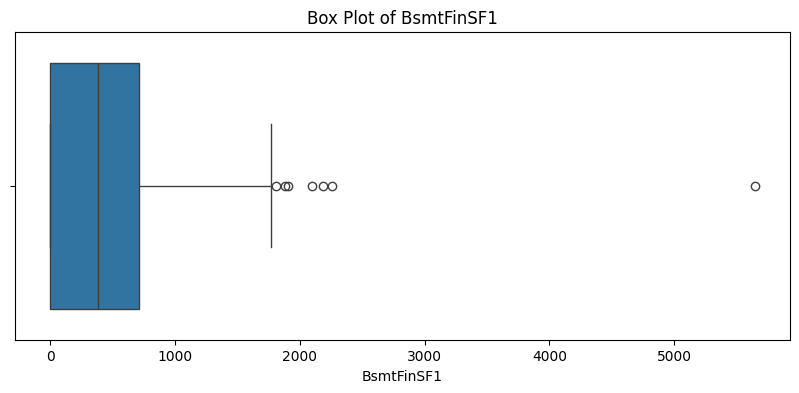

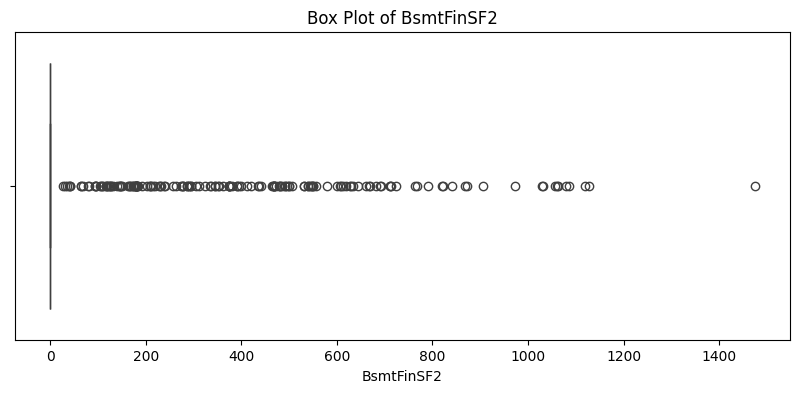

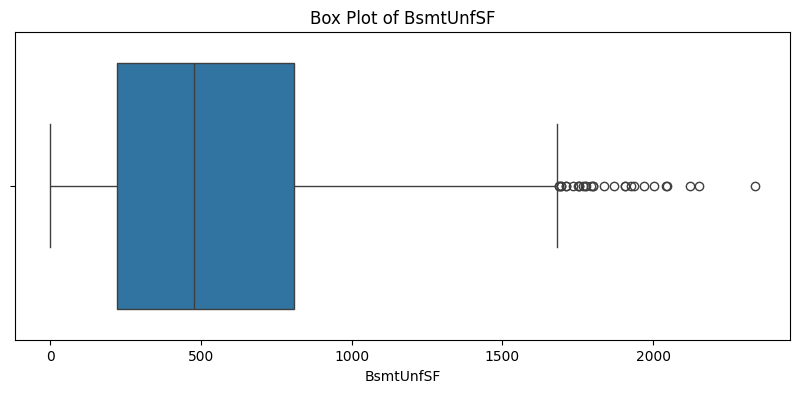

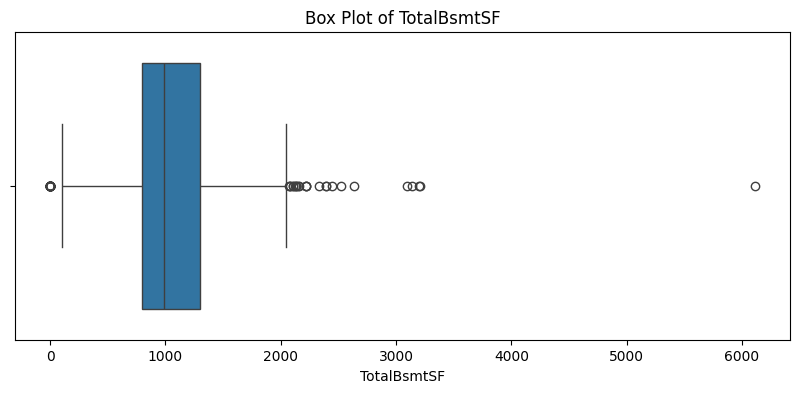

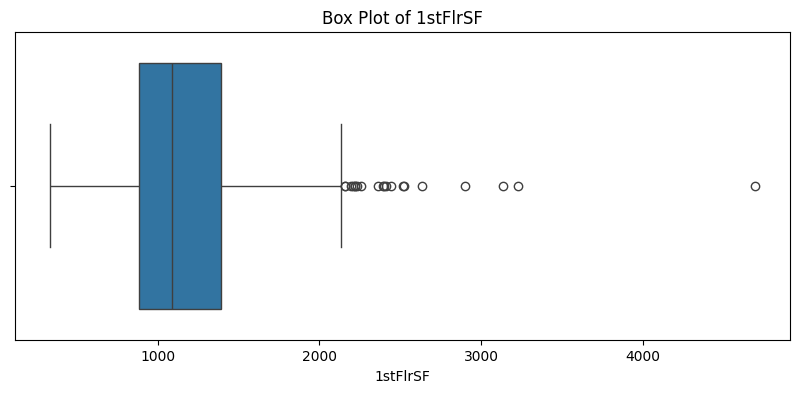

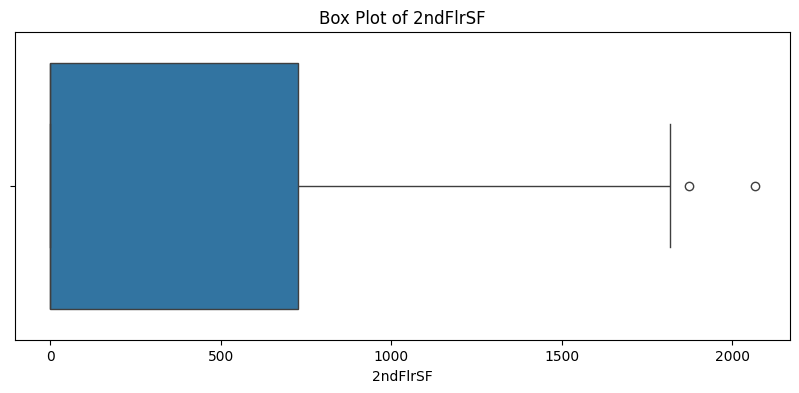

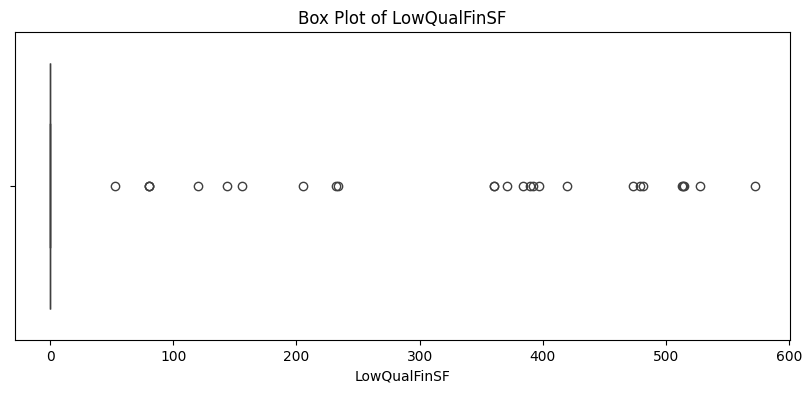

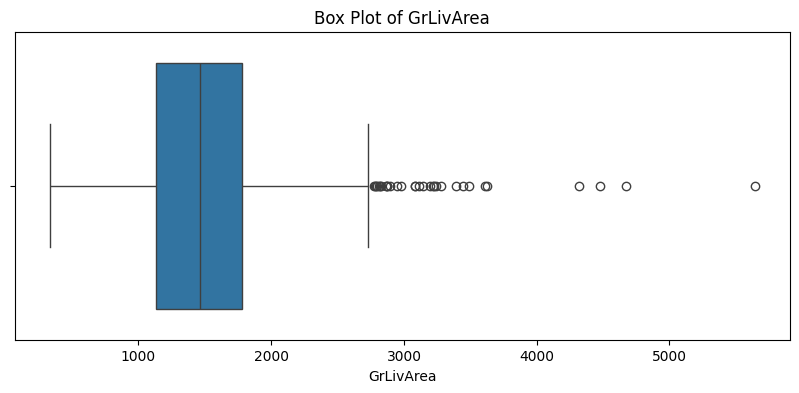

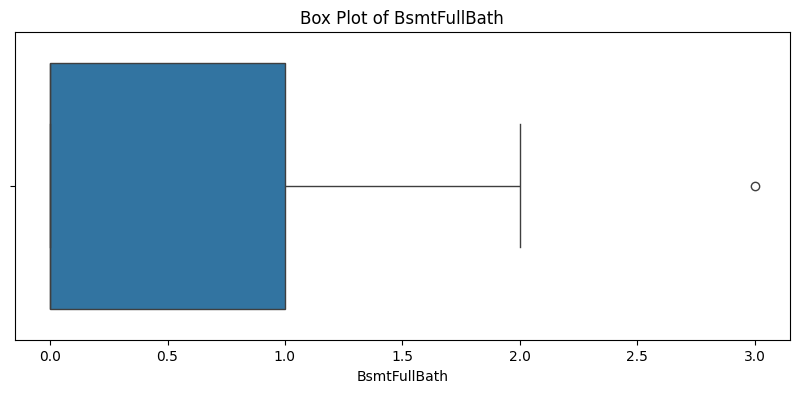

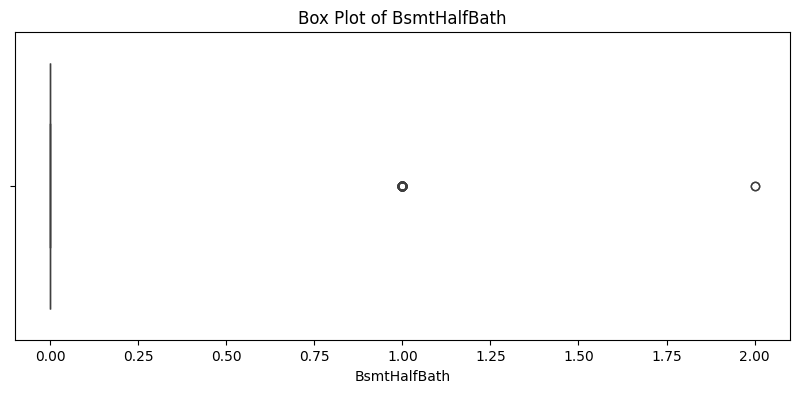

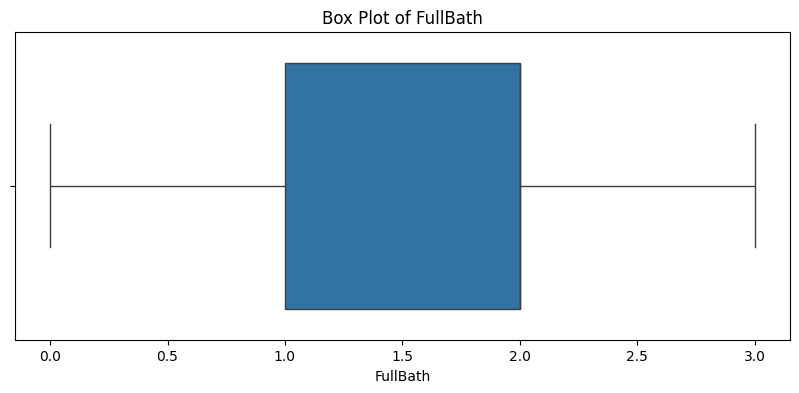

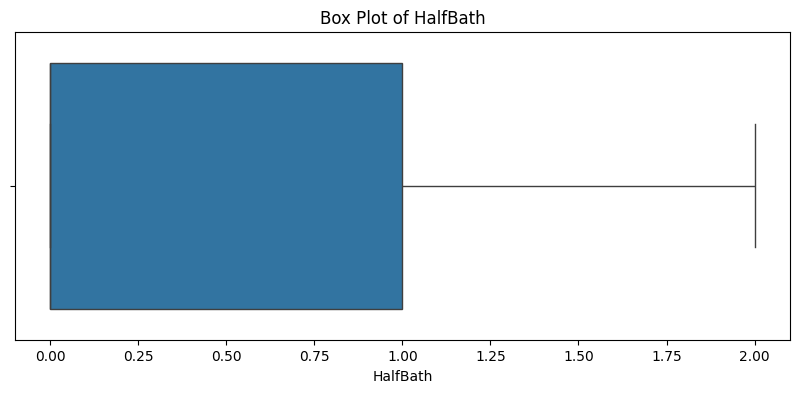

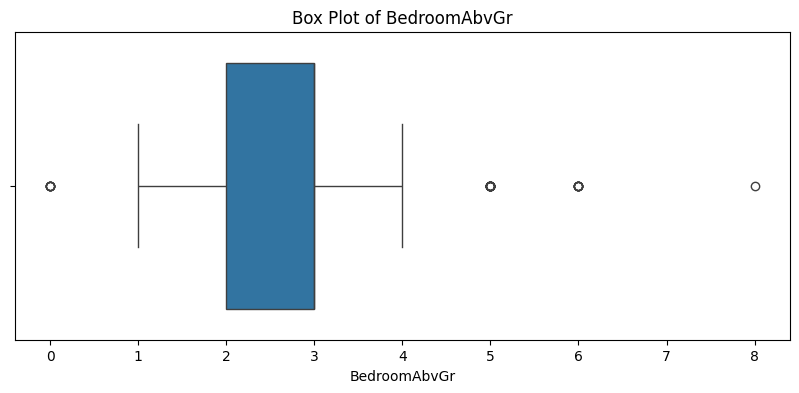

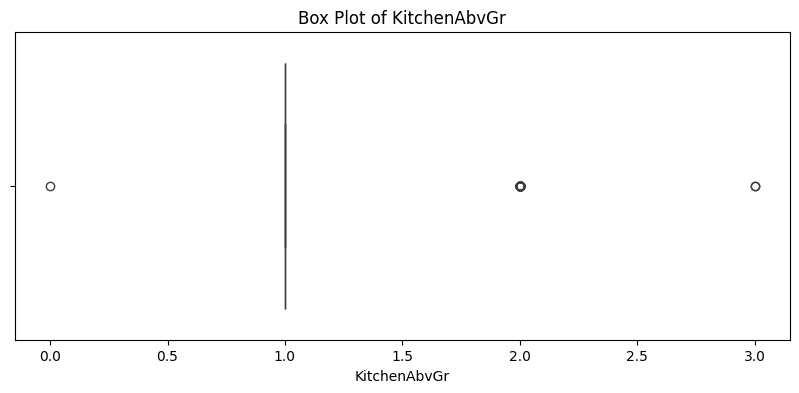

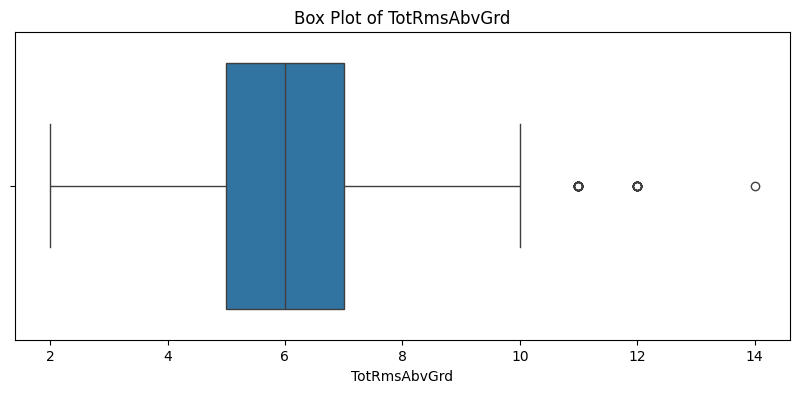

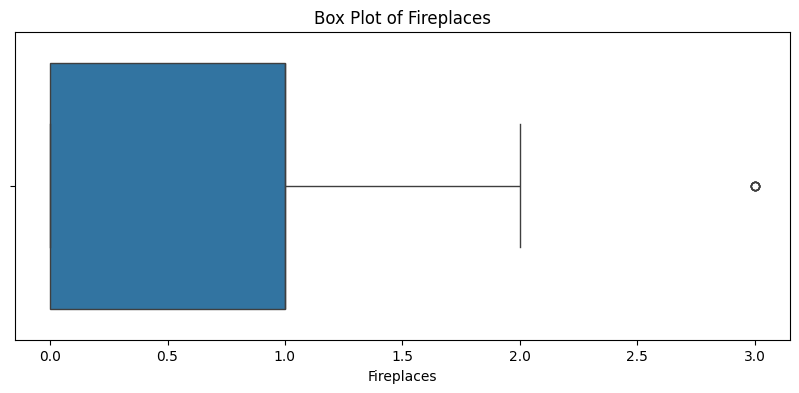

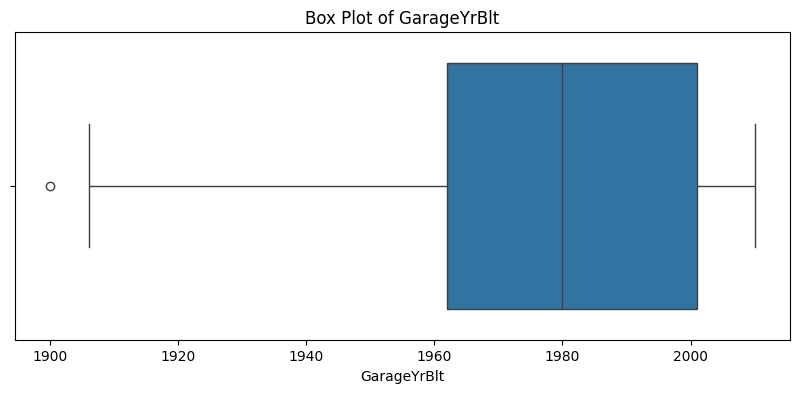

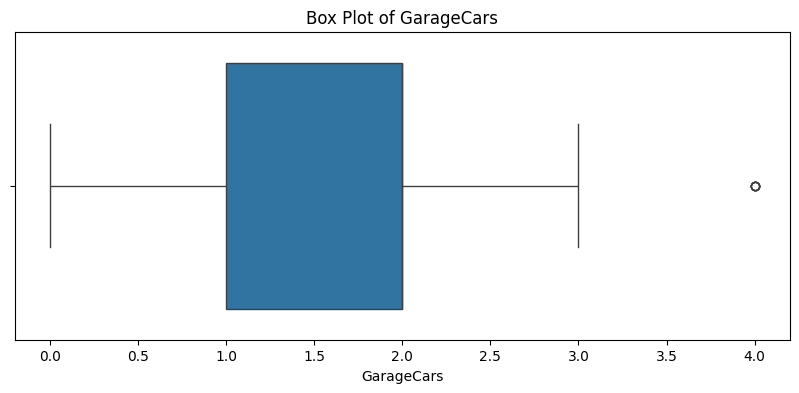

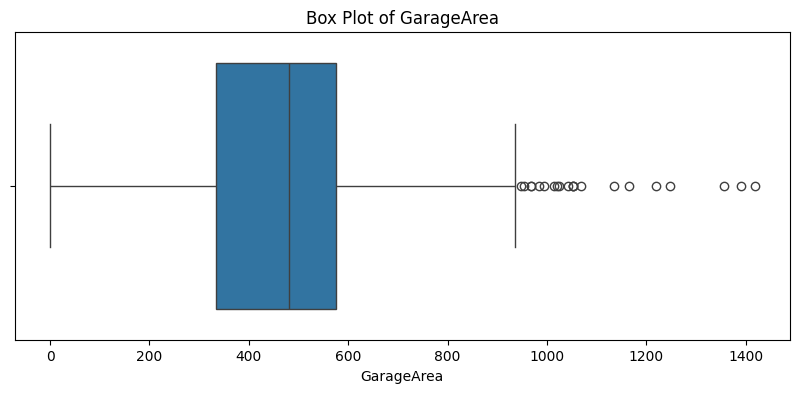

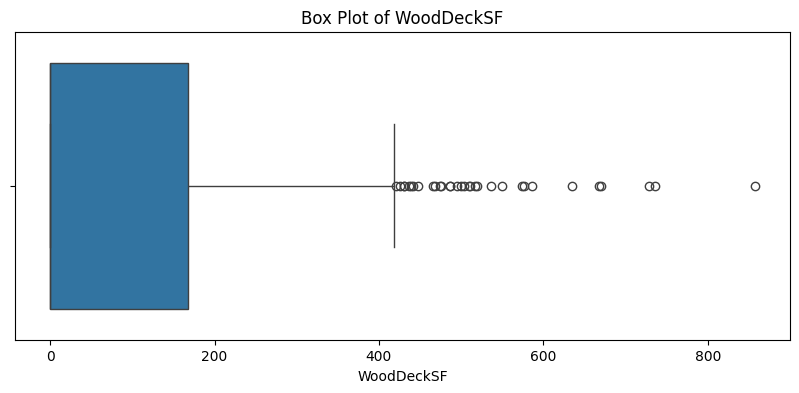

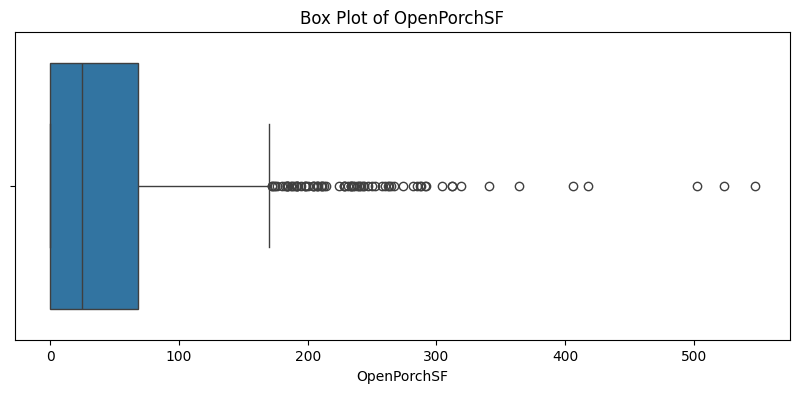

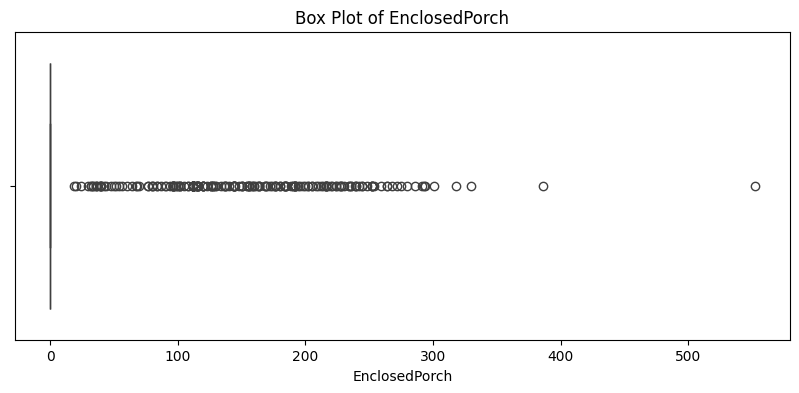

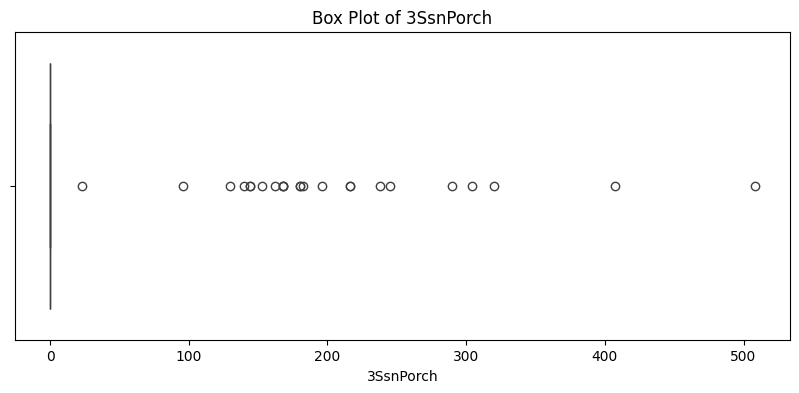

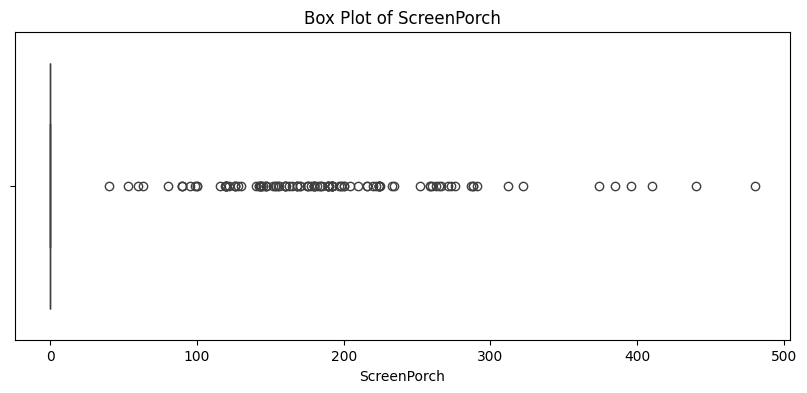

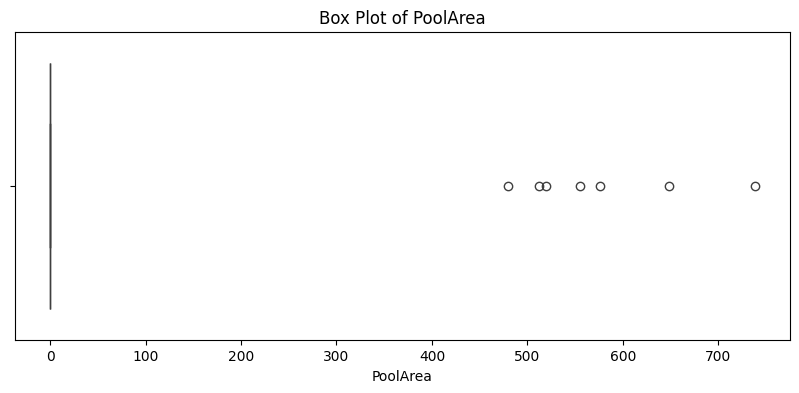

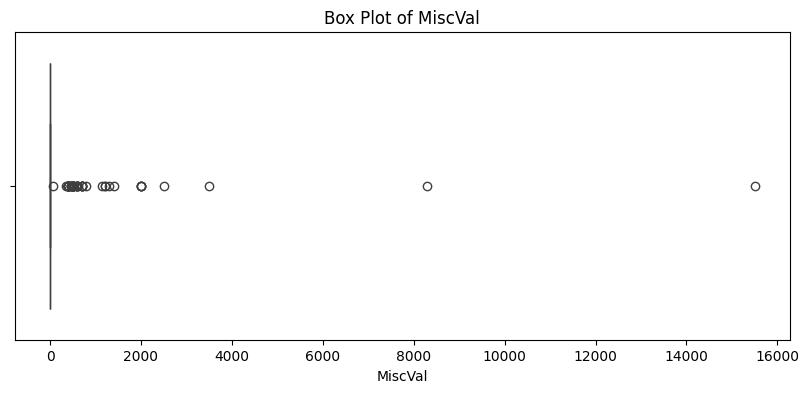

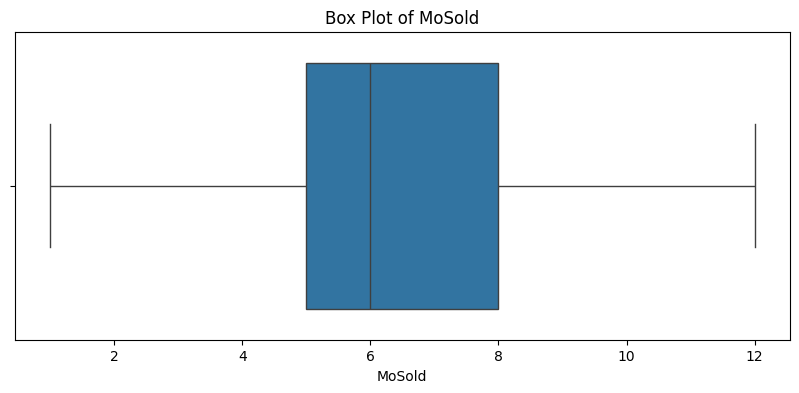

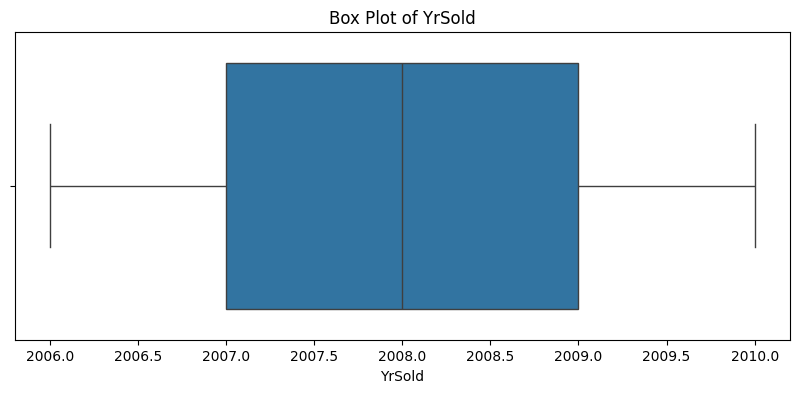

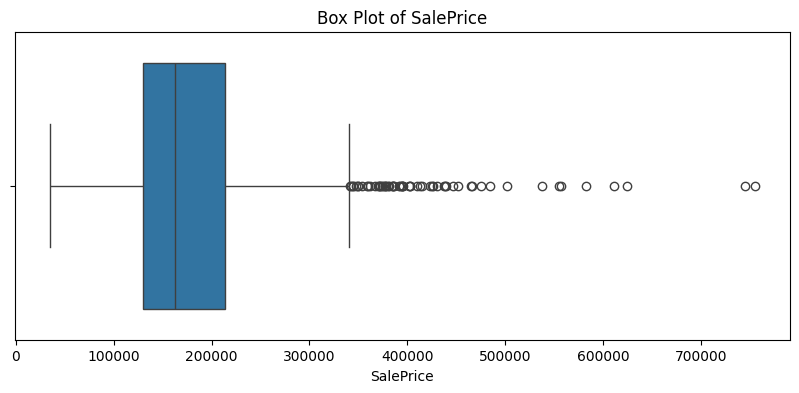

In [ ]:
for feature in numeric_features:
  plt.figure(figsize=(10,4))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

menghitung iqr, q1 & q3


In [ ]:
q1 = df[numeric_features].quantile(0.25)
q3 = df[numeric_features].quantile(0.75)
iqr = q3 - q1

hapus outlier

In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (q1 - 1.5*iqr)) | (df[numeric_features] > (q3 + 1.5*iqr))).any(axis=1)
df_filter_num = df.loc[condition, numeric_features]


# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filter_num, df.loc[condition, categorical_features]], axis=1)


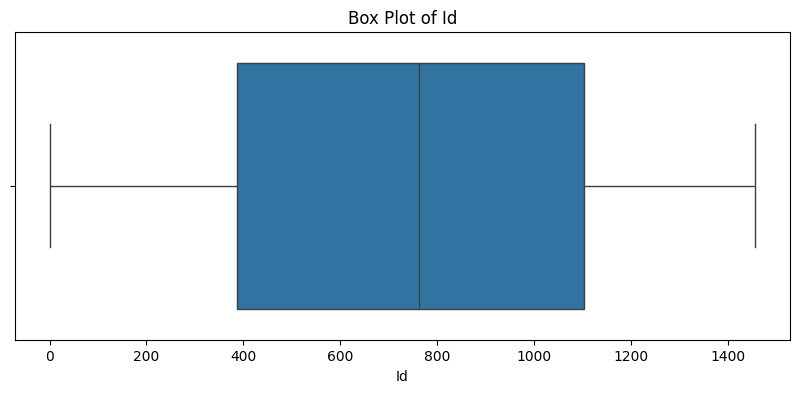

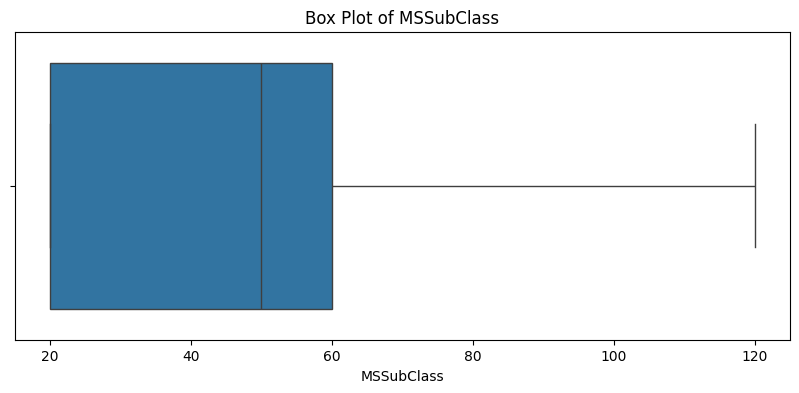

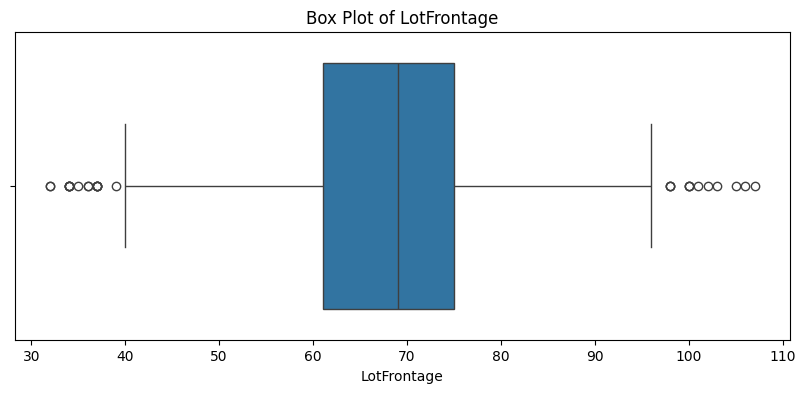

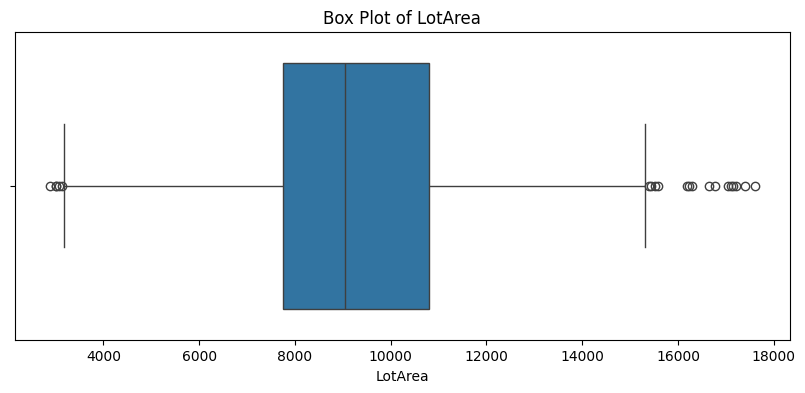

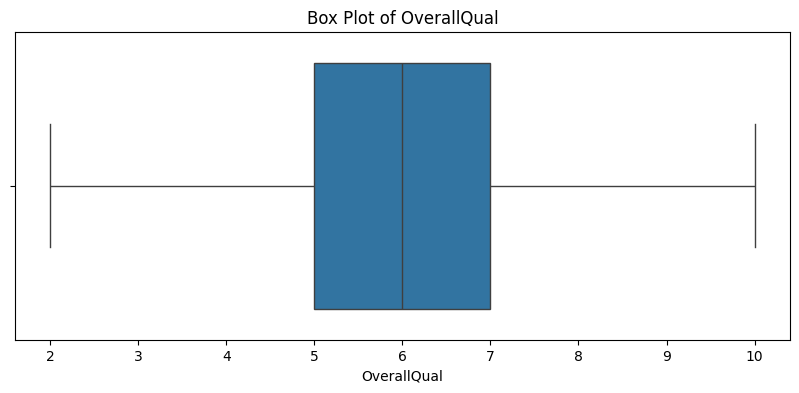

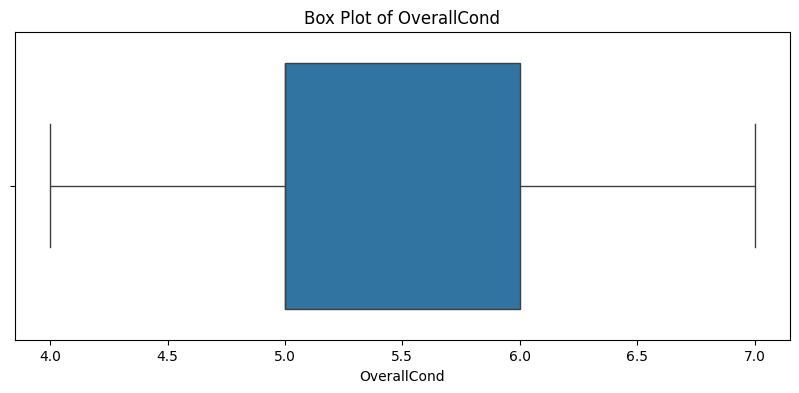

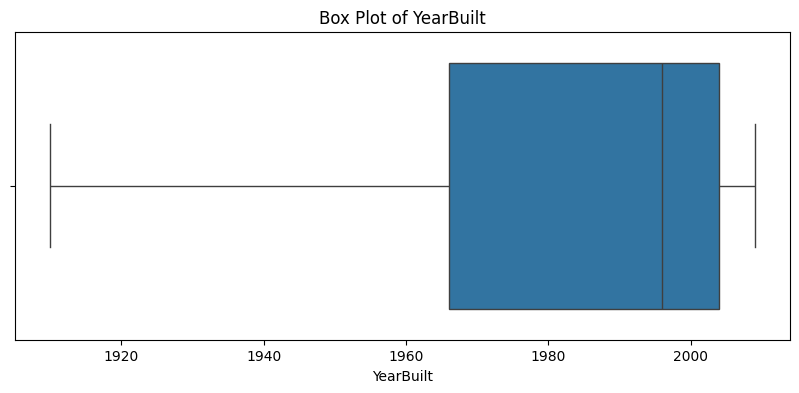

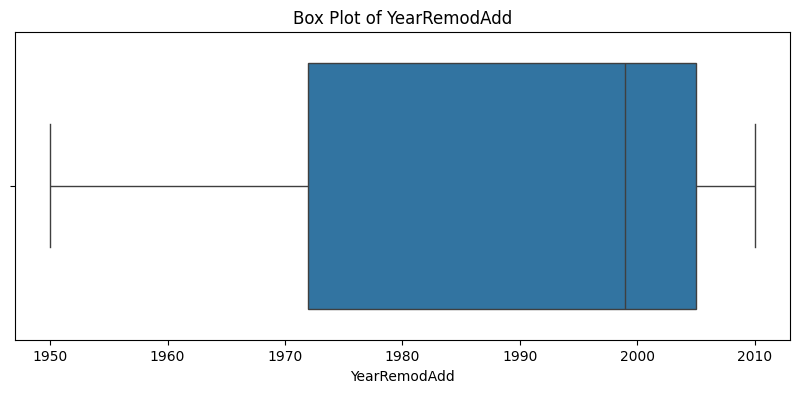

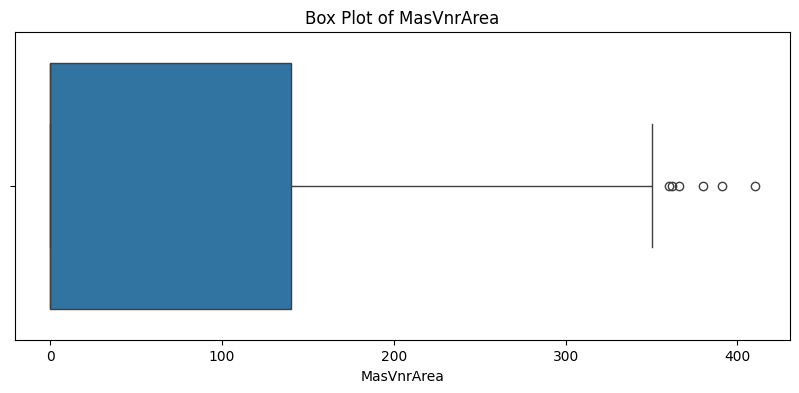

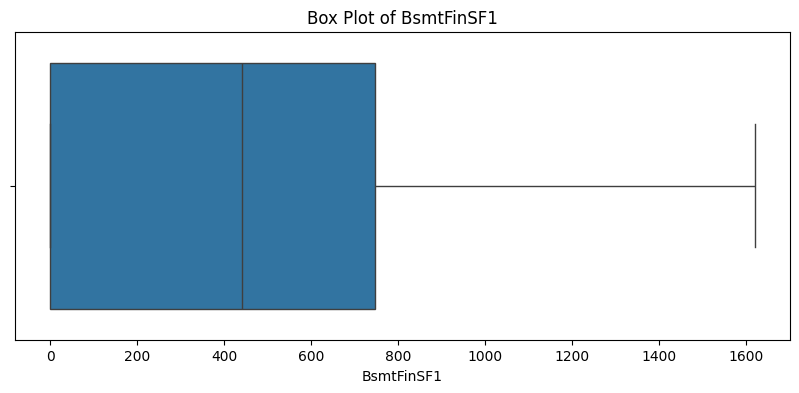

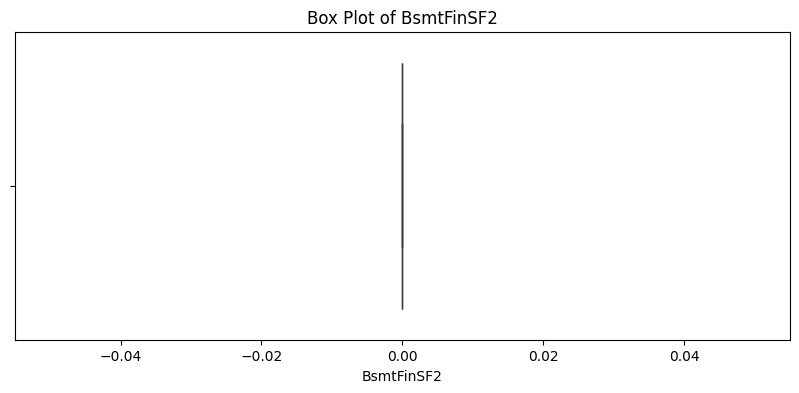

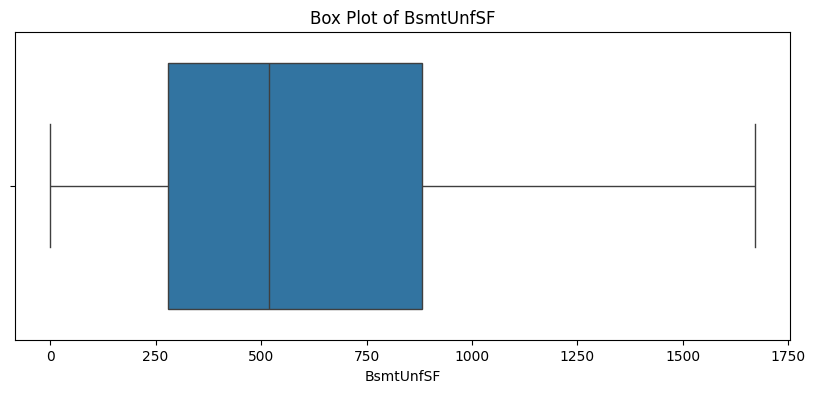

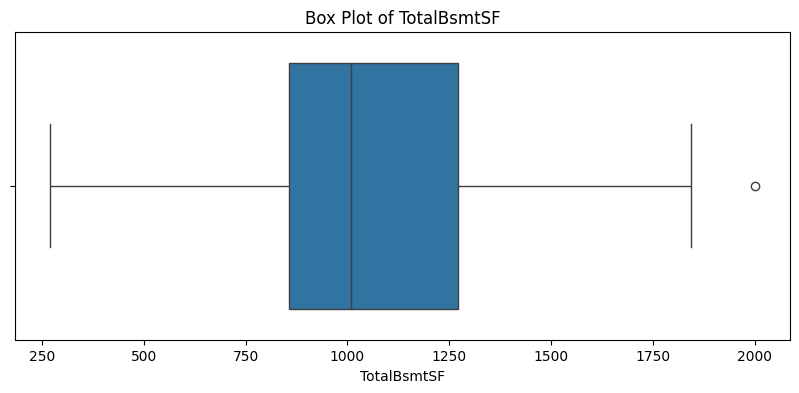

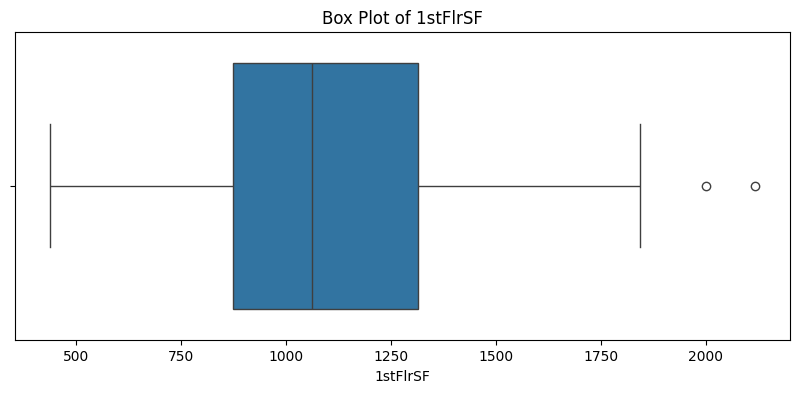

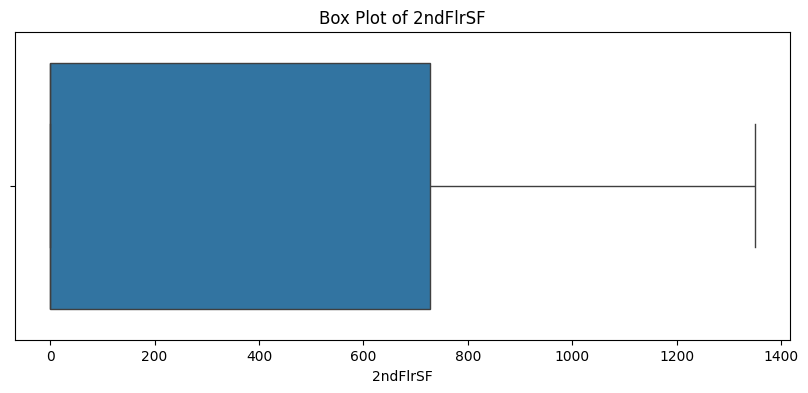

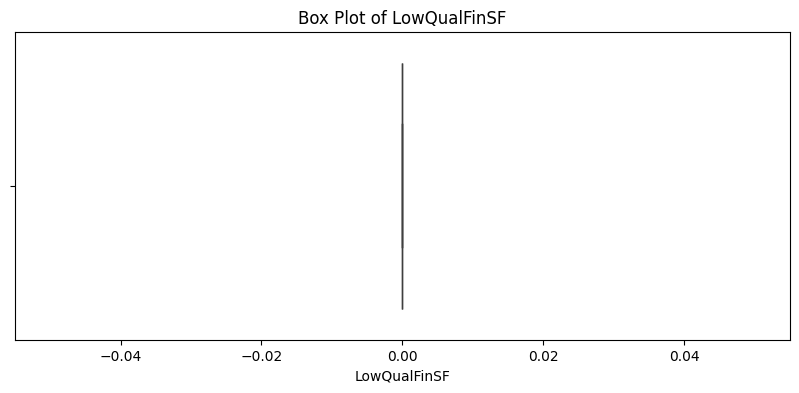

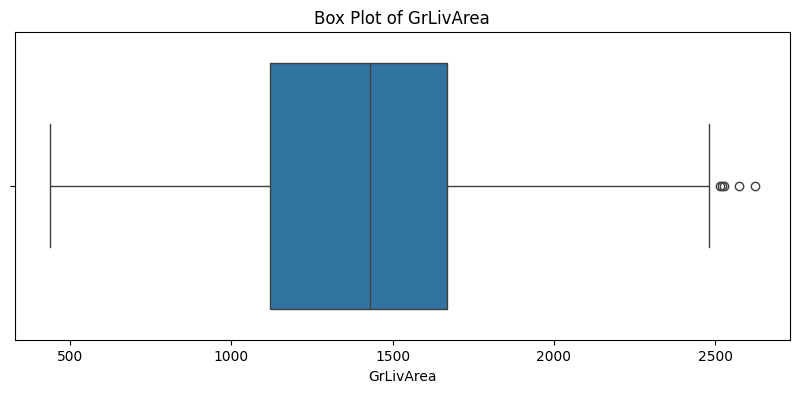

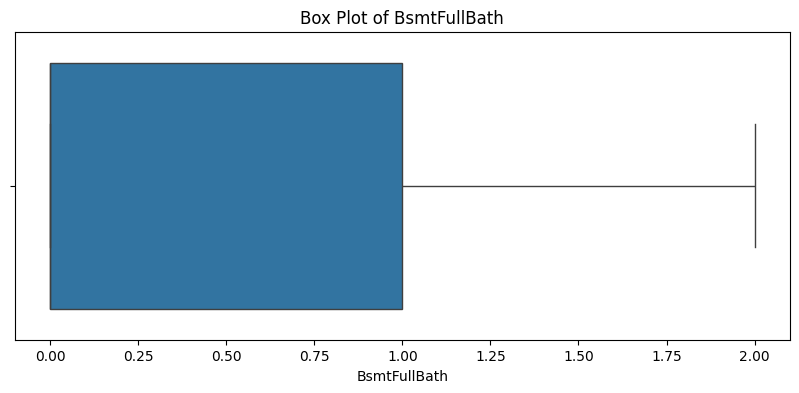

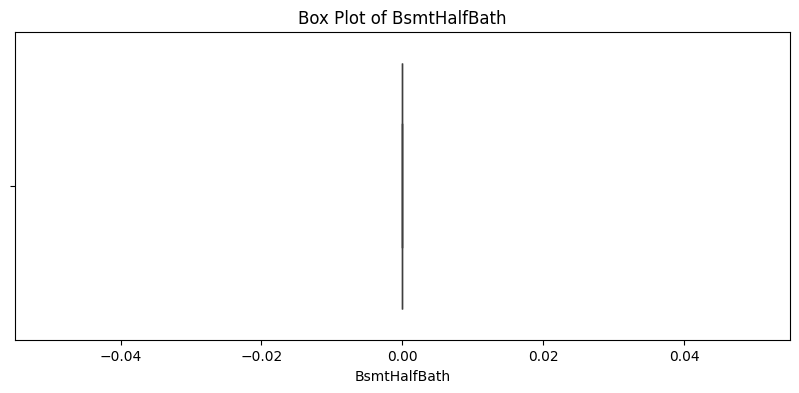

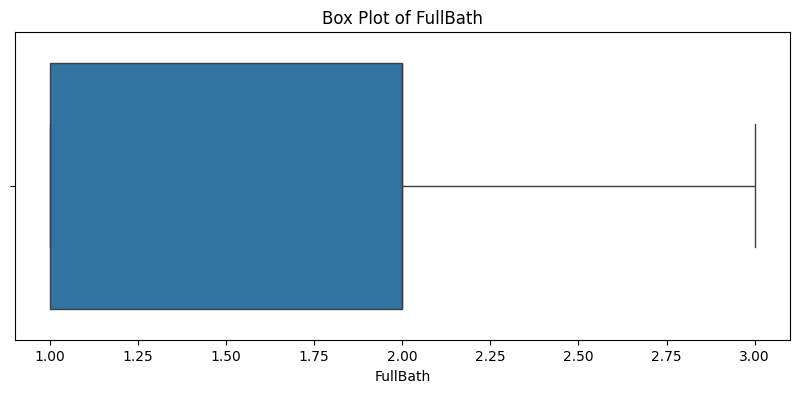

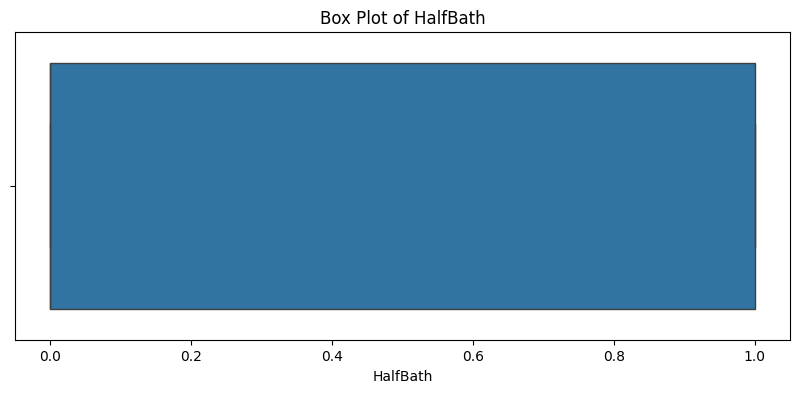

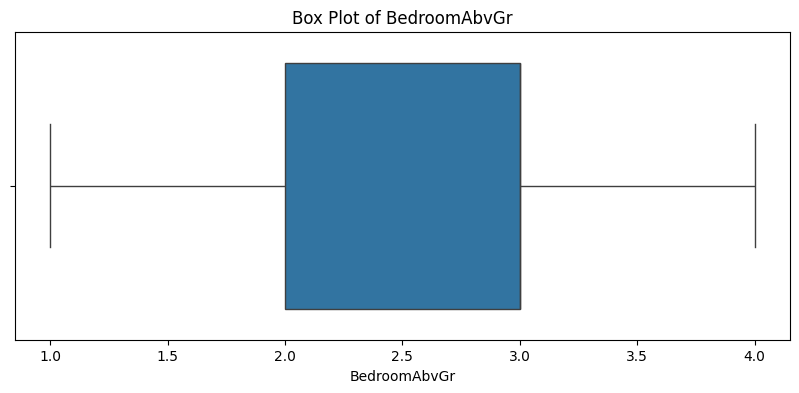

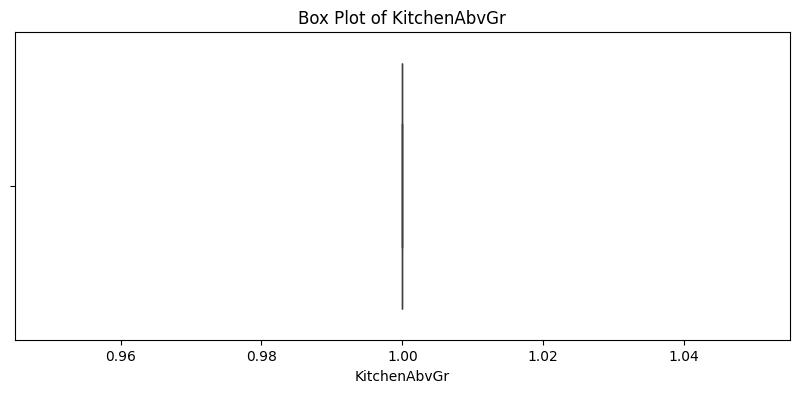

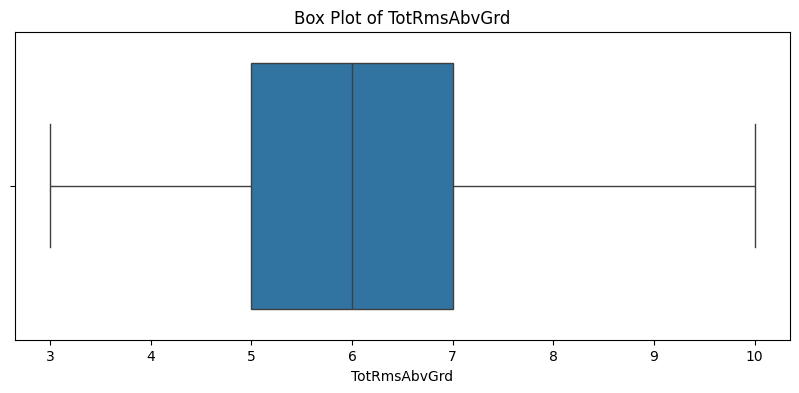

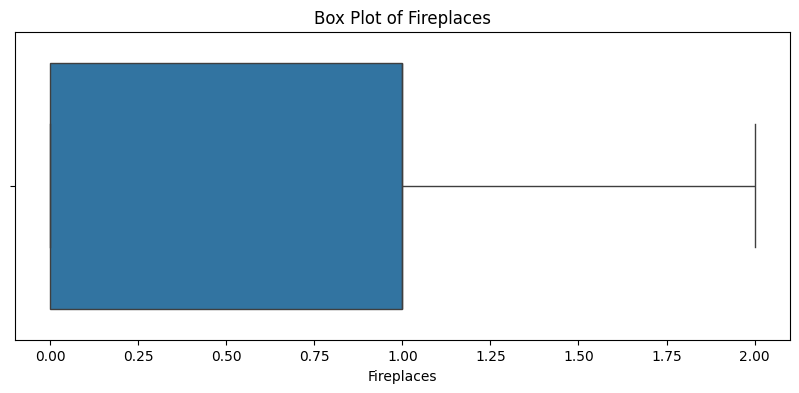

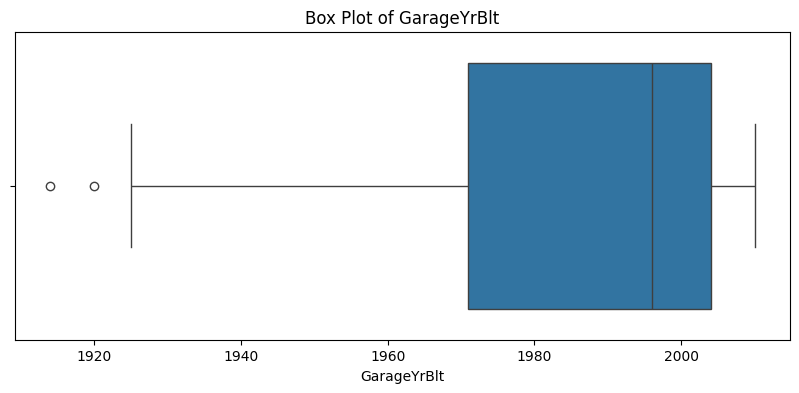

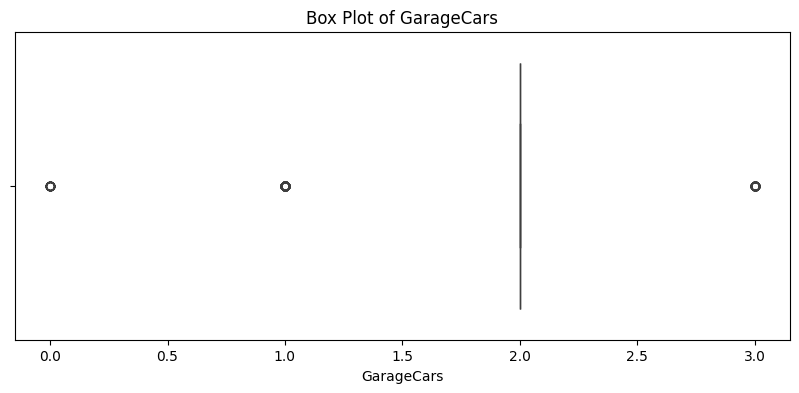

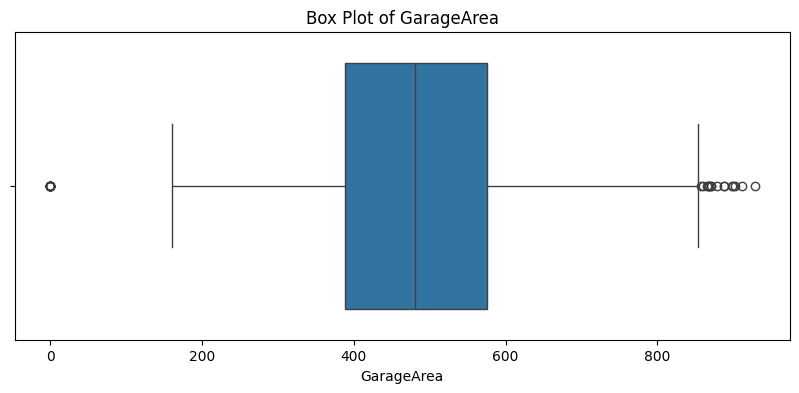

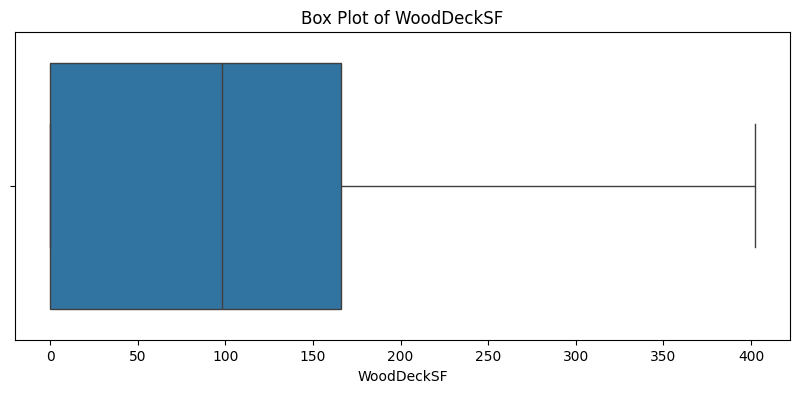

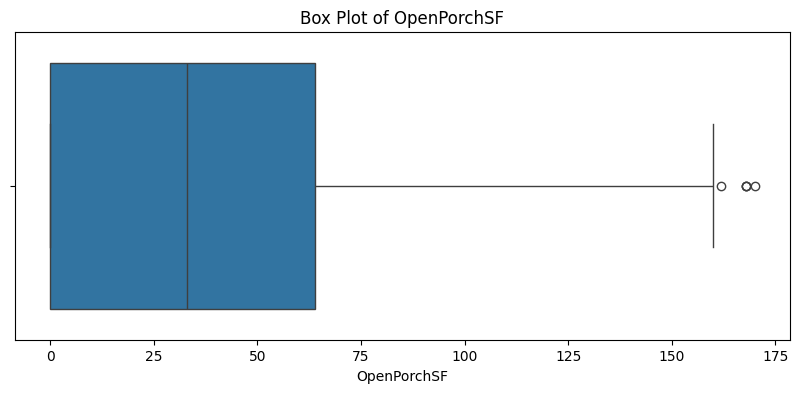

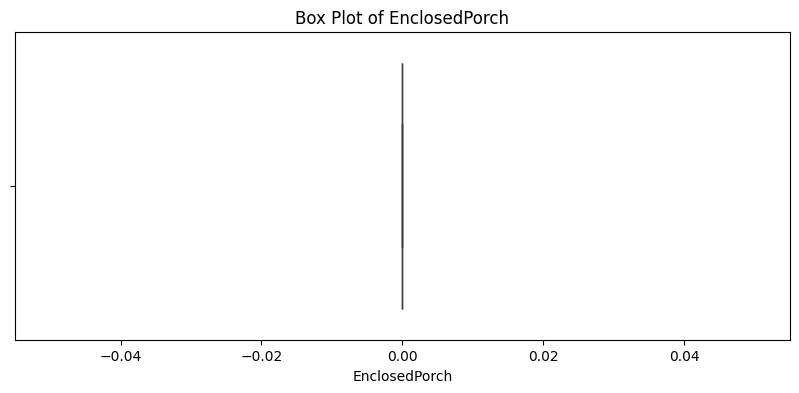

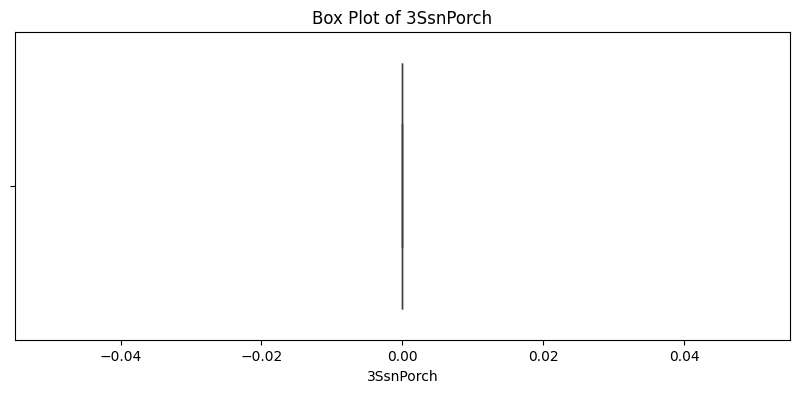

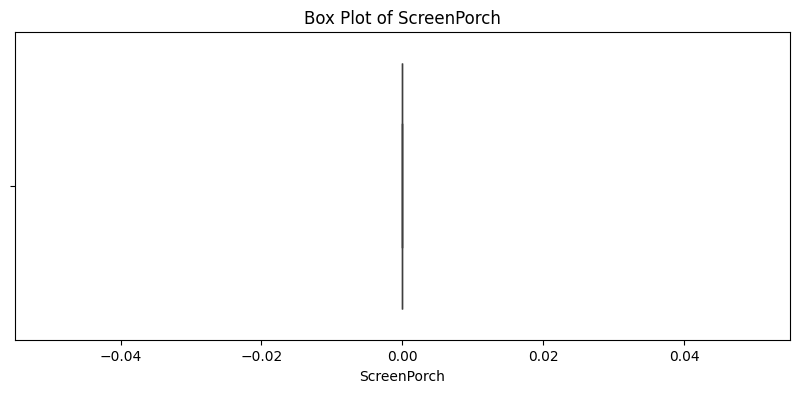

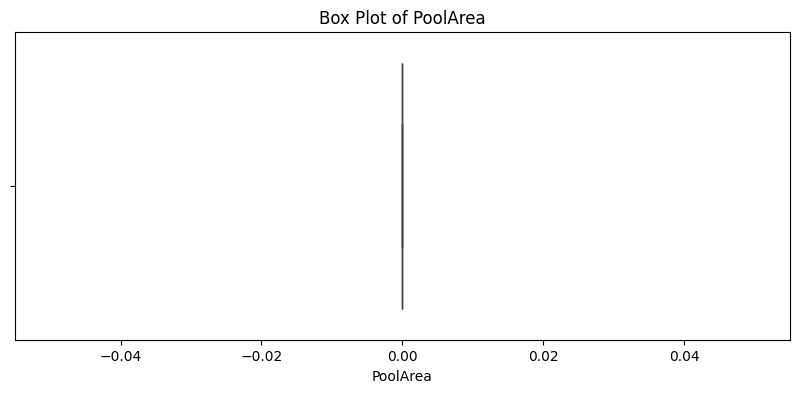

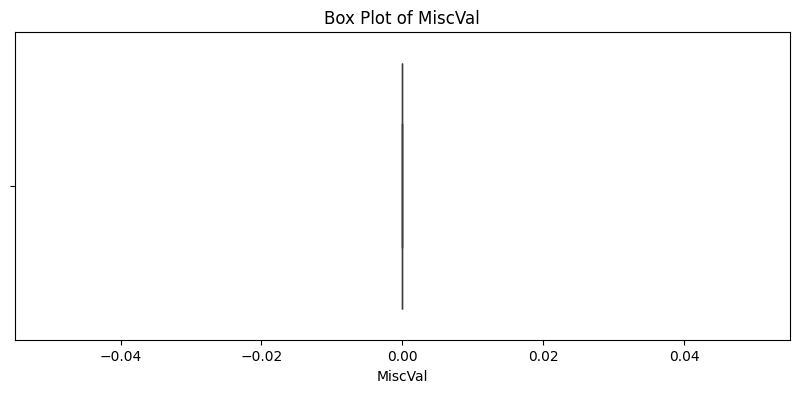

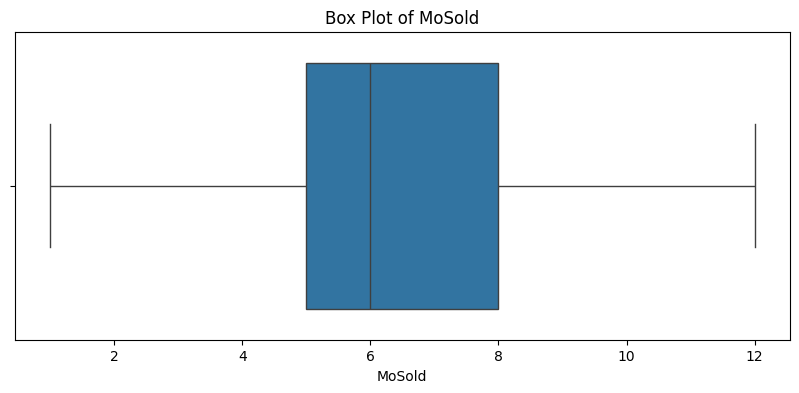

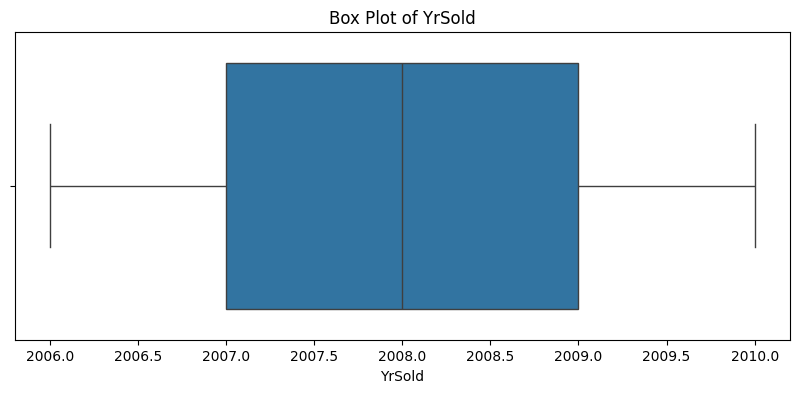

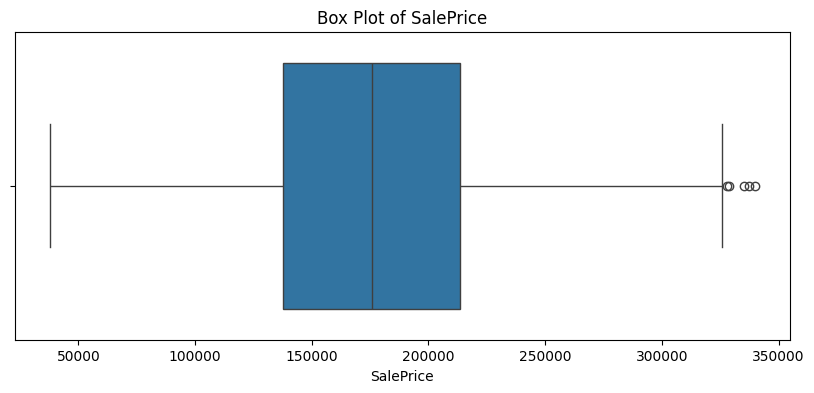

In [ ]:
# Menggabungkan kembali dengan kolom kategorikal
for feature in numeric_features:
  plt.figure(figsize=(10,4))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

Normalisasi dan standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler


# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

perbandingan data sebelum / sesudah di standarisasi

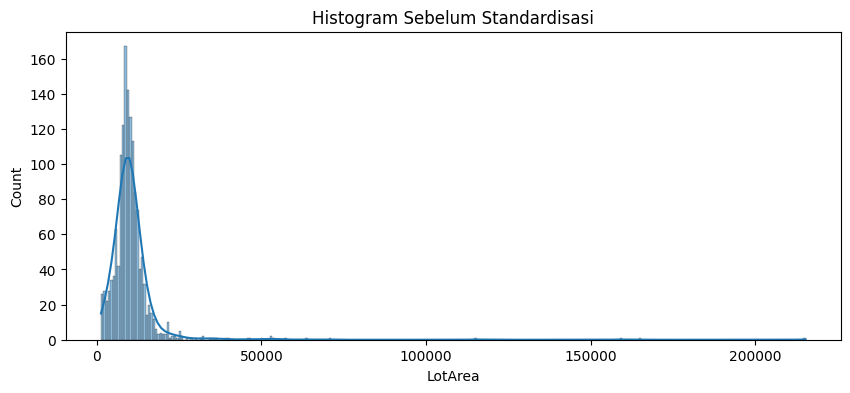

In [ ]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(10, 4))
sns.histplot(data_train[numeric_features[3]], kde=True)
plt.title('Histogram Sebelum Standardisasi')
plt.show()

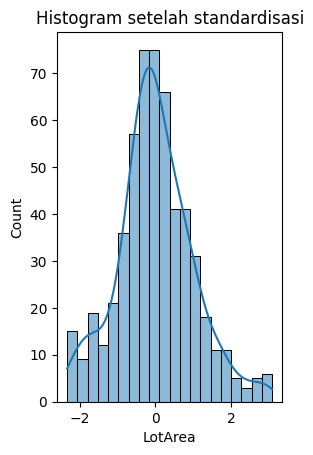

In [ ]:
# Histogram Setelah Standardisasi
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title('Histogram setelah standardisasi')

plt.show()

Memeriksa Data Duplikat

In [ ]:
# Mengidentifikasi baris duplikat
duplicate = df.duplicated()

print("Jumlah baris duplikat:", duplicate.sum())

Jumlah baris duplikat: 0


Mengkonversi Tipe Data

In [ ]:
#Periska data kategorikal

category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


menggunakan OHE

In [ ]:
#Gunakan OneHotEncoding
df_one_hot_encoded = pd.get_dummies(df, columns=category_features)
df_one_hot_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False


Menggunakan Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lab_encoded = pd.DataFrame(df)

for col in category_features:
    df_lab_encoded[col] = label_encoder.fit_transform(df[col])

# Melakukan label encoding pada kolom kategorikal

df_lab_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3


Exploratory Data Analysis

cek tabel setelah dilabel encoding

In [ ]:
df_lab_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3


cek missing value

In [ ]:
missing_value = df_lab_encoded.isnull().sum()

missing_percentage = (missing_value / len(df_lab_encoded)) * 100


missing_data = pd.DataFrame({
    'Jumlah Missing': missing_value,
    'Persentase Missing': missing_percentage
}).sort_values(by='Jumlah Missing', ascending=False)


missing_data[missing_data['Jumlah Missing']>0]

,Jumlah Missing,Persentase Missing


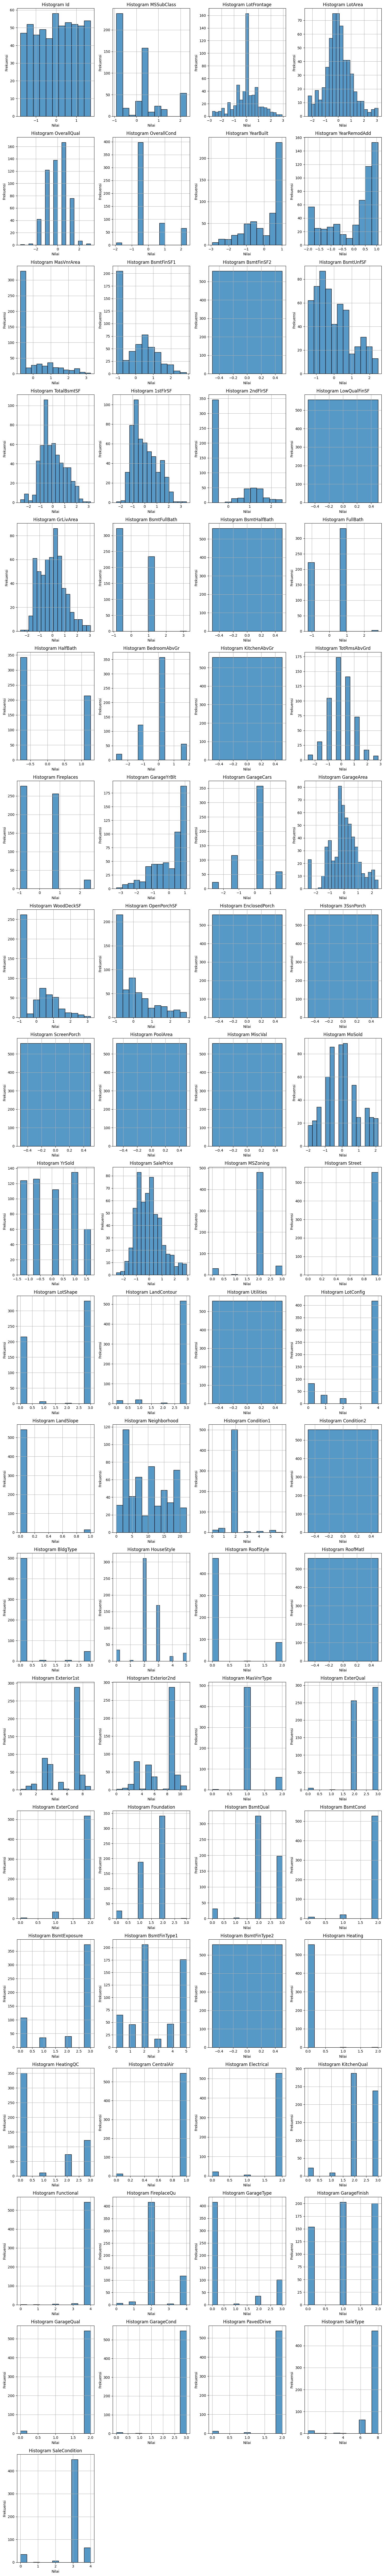

In [ ]:
# Menghitung jumlah variabel
num_vars = df_lab_encoded.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4
n_rows = -(-num_vars // n_cols)

# Membuat grid subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))


# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Iterasi melalui setiap kolom dan membuat histogram
for i, column in enumerate(df_lab_encoded.columns):
    sns.histplot(df_lab_encoded[column], ax=axes[i])
    axes[i].set_title(f'Histogram {column}')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Frekuensi')
    axes[i].grid(True)

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()



visualisasikan distribusi beberapa kolom serta melihat korelasi antara variabel numerik.

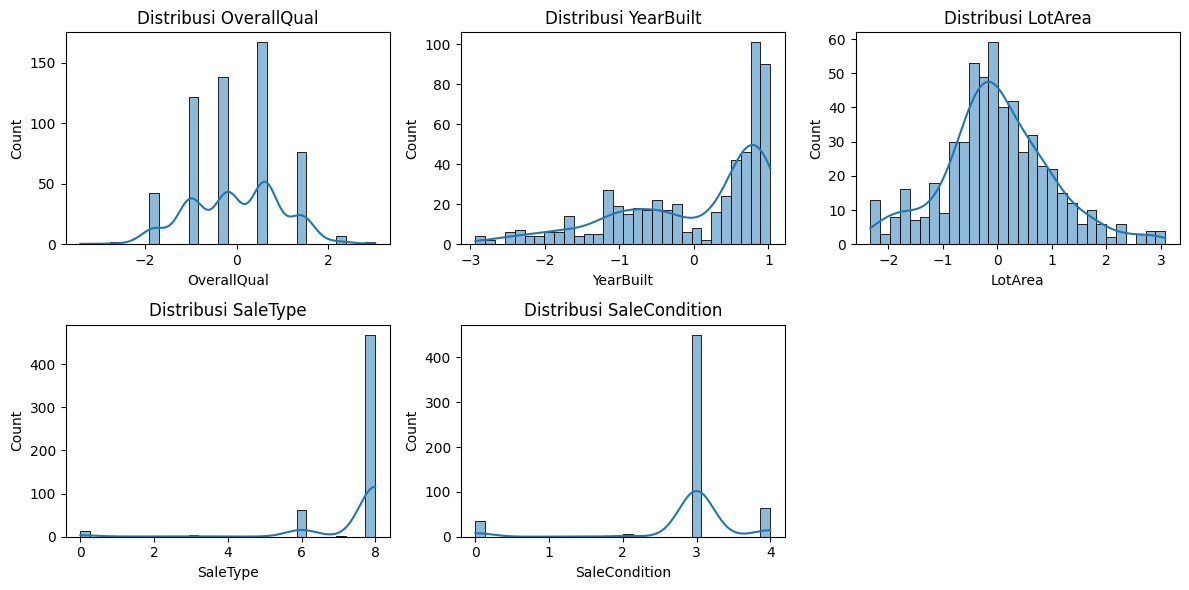

In [ ]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df_lab_encoded[column], kde=True, bins=30)
  plt.title(f'Distribusi {column}')
  plt.xlabel(column)

plt.tight_layout()
plt.show()


cek multi koleniaritas

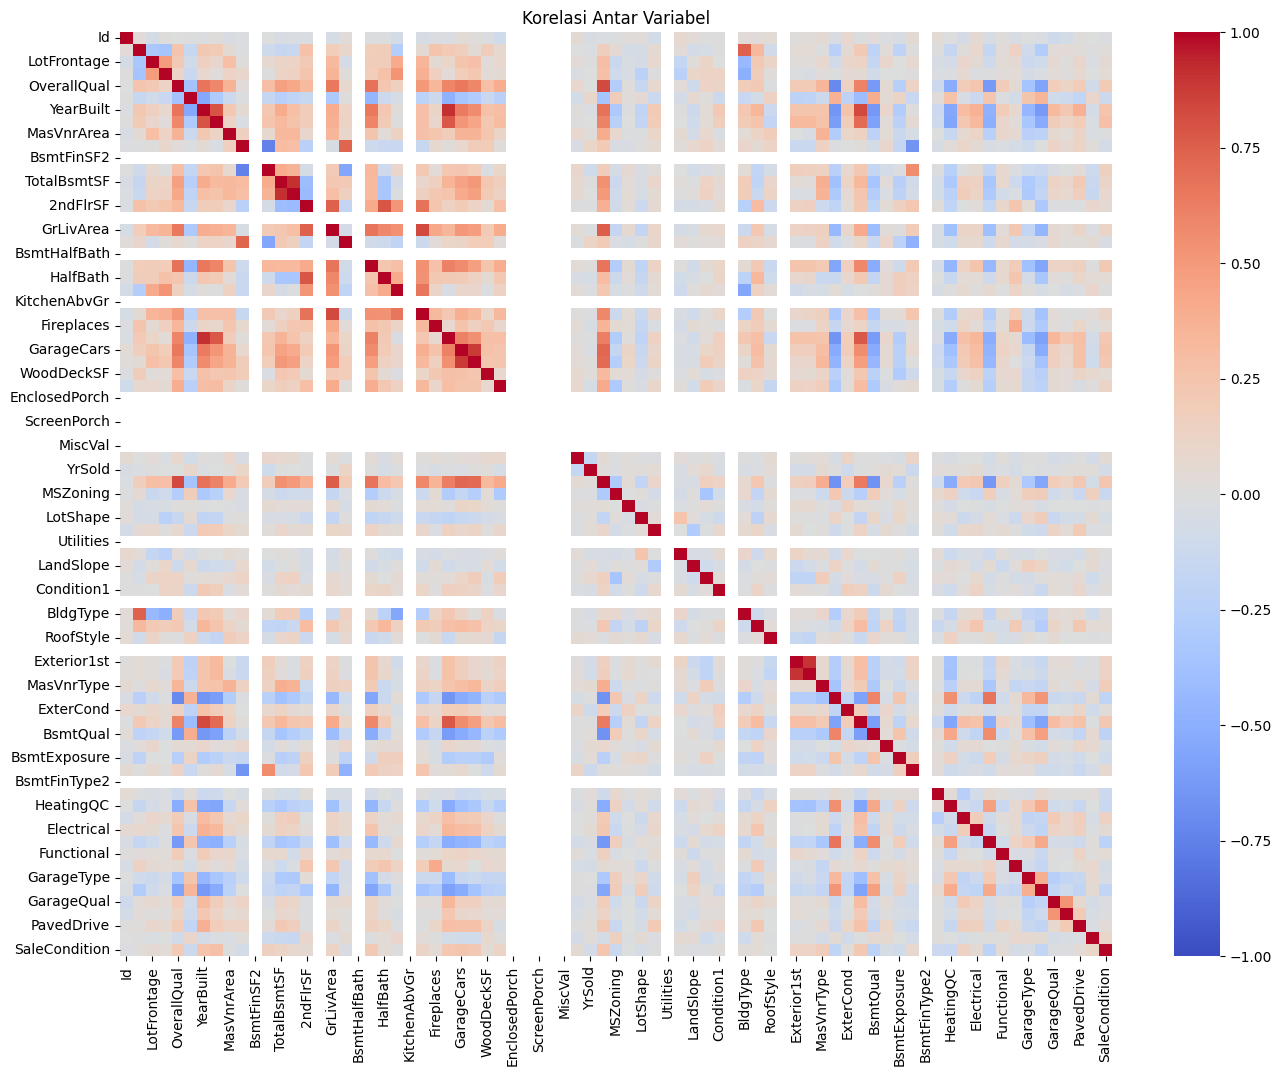

In [ ]:
# Visualisasi korelasi antar variabel numerik

plt.figure(figsize=(16,12))
cor_matrix = df_lab_encoded.corr()


sns.heatmap(cor_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Antar Variabel')
plt.show()


/tmp/ipython-input-1895905186.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr_sorted.index, y=target_corr_sorted, palette='viridis')


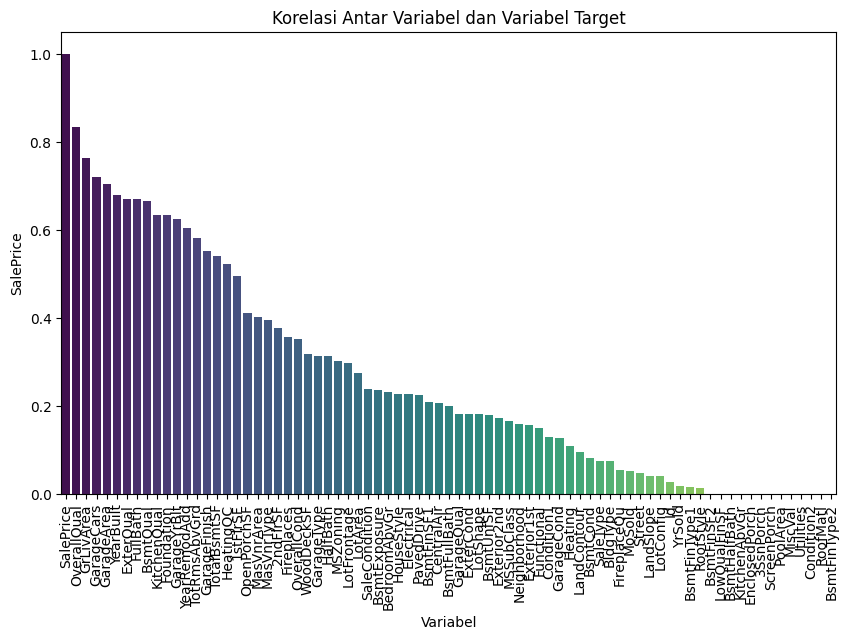

In [ ]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lab_encoded.corr()['SalePrice']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr_sorted.index, y=target_corr_sorted, palette='viridis')
plt.xticks(rotation=90)
plt.title('Korelasi Antar Variabel dan Variabel Target')
plt.xlabel('Variabel')
plt.show()

Splitting Data

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = df_lab_encoded.drop(columns=['SalePrice'])
y = df_lab_encoded['SalePrice']


# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# menghitung panjang/jumlah data
print(f'Jumlah Data adalah {len(X)}')

# menghitung panjang/jumlah data pada x_train
print(f'Jumlah data x_train adalah {len(x_train)}')

# menghitung panjang/jumlah data pada x_test
print(f'Jumlah data x_test adalah {len(x_test)}')

# menghitung panjang/jumlah data pada y_train
print(f'Jumlah data y_train adalah {len(y_train)}')

# menghitung panjang/jumlah data pada y_test
print(f'Jumlah data y_test adalah {len(y_test)}')

Jumlah Data adalah 557
Jumlah data x_train adalah 445
Jumlah data x_test adalah 112
Jumlah data y_train adalah 445
Jumlah data y_test adalah 112


Training Model

In [ ]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(random_state=184)
GB.fit(x_train, y_train)


GradientBoostingRegressor(random_state=184)

Evaluasi Model

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error, r2_score

LARS

In [ ]:
# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_result = pd.DataFrame(data, index=['Lars Result'])

# Menampilkan DataFrame
print(df_result)

                  MAE       MSE        R2
Lars Result  0.666904  0.726562  0.216688


Linear Regression

In [ ]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)


# Menambahkan hasil evaluasi LR ke DataFrame
df_result.loc['LR Result'] = [mae_LR, mse_LR, r2_LR]

# Menampilkan DataFrame
print(df_result)

                  MAE       MSE        R2
Lars Result  0.666904  0.726562  0.216688
LR Result    0.241011  0.104287  0.887567


Gradient Boosting

In [ ]:
# Evaluasi pada model Gradient Boosting Regressor
pred_GB = GB.predict(x_test)
mae_GB = mean_absolute_error(y_test, pred_GB)
mse_GB = mean_squared_error(y_test, pred_GB)
r2_GB = r2_score(y_test, pred_GB)


# Menambahkan hasil evaluasi GBR ke DataFrame
df_result.loc['GBR Result'] = [mae_GB, mse_GB, r2_GB]

# Menampilkan DataFrame
print(df_result)

                  MAE       MSE        R2
Lars Result  0.666904  0.726562  0.216688
LR Result    0.241011  0.104287  0.887567
GBR Result   0.218814  0.107409  0.884202


Menyimpan Model untuk Deployment

In [ ]:
# Menyimpan model ke dalam file
joblib.dump(GB, 'GB_model.joblib')

['GB_model.joblib']

Deployement & Monitoring Model

In [ ]:
!pip install pyngrok


In [ ]:
import joblib

In [ ]:
import pickle


# Menyimpan model ke dalam file
with open('GB_model.pkl', 'wb') as file:
    pickle.dump(GB, file)

In [ ]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 3s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [ ]:
from flask import Flask, request, jsonify
import threading

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    return jsonify({"message": "Flask OK di Colab"})

def run_flask():
    app.run(port=5000)

thread = threading.Thread(target=run_flask)
thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [ ]:
!lt --port 5000


your url is: https://big-paws-exist.loca.lt
^C


In [ ]:
# Memuat model dari file joblib
joblib_model = joblib.load('GB_model.joblib')

# Memuat model dari file pickle
with open('GB_model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
from flask import Flask, request, jsonify
import threading

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    return jsonify({"message": "OK dari Flask Colab"})

def run_flask():
    app.run(port=5000)

thread = threading.Thread(target=run_flask)
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)  # port Flask
public_url

ERROR:pyngrok.process.ngrok:t=2025-11-22T13:29:39+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-11-22T13:29:39+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
from flask import Flask, request, jsonify
import joblib

# Inisialisasi aplikasi Flask
app = Flask(__name__)

# Memuat model yang telah disimpan
joblib_model = joblib.load('GB_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
  data = request.json['data'] # Mengambil data dari request JSON
  prediction = joblib_model.predict(data) # Melakukan prediksi (harus dalam bentuk 2D array)
  return jsonify({'prediction': prediction.tolist()})


if __name__ == '__main__':
  app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(5000)
print(public_url)

ERROR:pyngrok.process.ngrok:t=2025-11-22T13:27:26+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.